Divorce Prediction
-------------------------------

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar

--2021-06-16 00:21:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33041 (32K) [application/x-httpd-php]
Saving to: ‘divorce.rar’

divorce.rar         100%[===================>]  32.27K   134KB/s    in 0.2s    

2021-06-16 00:21:08 (134 KB/s) - ‘divorce.rar’ saved [33041/33041]



In [7]:
!unrar x -r divorce.rar


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from divorce.rar

Extracting  divorce.csv                                                  6  OK 
Extracting  divorce.xlsx                                                99  OK 
All OK


------------------
Importing CSV file 

In [11]:
df = pd.read_csv('divorce.csv',delimiter = ';')
df.shape

(170, 55)

In [49]:
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [24]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [31]:
# All columns name 
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

-----------------------
Count the number of missing values


In [33]:
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data

,# NULL values
Class,0
Atr14,0
Atr25,0
Atr24,0
Atr23,0
Atr22,0
Atr21,0
Atr20,0
Atr19,0
Atr18,0


---------------------------
Corelation visualization 

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

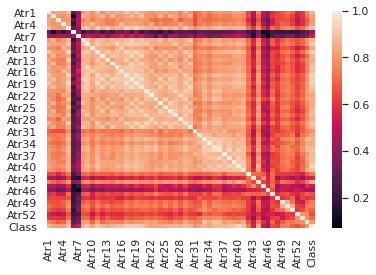

In [34]:
import seaborn as sns; 
sns.set()
ax = sns.heatmap(df.corr())

In [59]:
#Split the target columns and features columns
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
print('Shape of X : ', X.shape)
print('Shape of Y : ', Y.shape)

Shape of X :  (170, 54)
Shape of Y :  (170,)


In [62]:
#Split the training data and testing data seperatly. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

-------------------------
Lets train and predict using DecisionTreeClassifier

In [75]:
DecisionTree = DecisionTreeClassifier()
%time DecisionTree.fit(X_train, Y_train)
Y_predicted = DecisionTree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predicted)
print("Decision Tree Accuracy : ", accuracy)

CPU times: user 2.29 ms, sys: 4.05 ms, total: 6.34 ms
Wall time: 5.64 ms
Decision Tree Accuracy :  0.9705882352941176


-------------------------
Lets train and predict using Perceptron

In [79]:
perceptron = Perceptron(random_state = 0)
%time perceptron.fit(X_train, Y_train)
Y_predicted_perceptron = perceptron.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predicted_perceptron)
print("Perceptron Accuracy : ", accuracy)

CPU times: user 4.47 ms, sys: 670 µs, total: 5.14 ms
Wall time: 4.67 ms
Decision Tree Perceptron :  0.9705882352941176


In [ ]:
-------------------------
Lets train and predict using LogisticRegression

In [80]:
LogisticRegression = LogisticRegression(random_state = 0)
%time LogisticRegression.fit(X_train, Y_train)
print("LogisticRegression Accuracy : ", accuracy_score(Y_test, LogisticRegression.predict(X_test)))

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 44.1 ms
Decision Tree Perceptron :  1.0


LogisticRegression gives high accuracy model for this Divorce Prediction model when compare to DecisionTreeClassifier and Perceptron
--------------------------------